# Student Notebook
#### This notebook is for you to take notes and save directly to your Google drive and GITHUB.

Please upload your changes so you can review it later.

# Introduction to Python Basics I

In [87]:
# loading libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import stats
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 새 섹션

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loans (2).csv')
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
df.shape

(443, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


In [6]:
df.dtypes

client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [7]:
#load_id to object
df['load_id']=df['loan_id'].astype('object')
#repaid to category dtype
df['repaid']=df['repaid'].astype('category')
#loan_(start and end) to data type
df['loan_start']=pd.to_datetime(df['loan_start'], format='%Y-%m-%d')
#load_end
df['loan_end']=pd.to_datetime(df['loan_end'], format='%Y-%m-%d')


In [8]:
df.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                 int64
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
load_id                object
dtype: object

In [9]:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_start,loan_end,load_id
count,443,443.0,443,443,443.0
unique,4,2.0,430,428,443.0
top,home,1.0,2007-05-16 00:00:00,2008-08-29 00:00:00,10243.0
freq,121,237.0,2,2,1.0
first,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00,NaN
last,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00,NaN


# missing values


In [10]:
df.isnull().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
load_id        0
dtype: int64

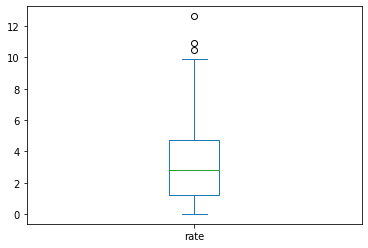

In [11]:
df['rate'].plot(kind='box')

Transformation
SQRT transdormation

In [16]:
df['SQRT_RATE'] = df['rate']**0.5

In [17]:
df['sqrt_rate']=np.sqrt(df['rate'])

In [18]:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,load_id,SQRT_RATE,sqrt_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,10243,1.466288,1.466288
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,10984,1.118034,1.118034
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,10990,0.824621,0.824621
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,10596,1.113553,1.113553
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,11415,1.769181,1.769181


In [19]:
print("The skewness of the original data is {}". format(df.rate.skew()))
print('The skewness of the SQRT Transformated data is {}'.format(df.SQRT_RATE.skew()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT Transformated data is 0.04964154055528862


In [20]:
print("The kurtosis of the original data is {}". format(df.rate.kurt()))
print('The kurosis of the SQRT transformated data is {}'.format(df.sqrt_rate.kurt()))

The kurtosis of the original data is 0.4243716514373652
The kurosis of the SQRT transformated data is -0.6318437642052039


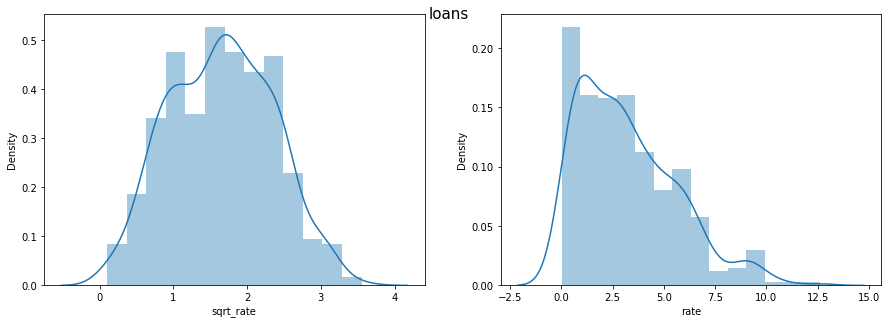

In [39]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
plt.suptitle('loans',fontsize=15, y=0.9)

sns.distplot(df['rate'],ax=axes[1])
sns.distplot(df['sqrt_rate'],ax=axes[0])

Log Transformation for eliminate skewness

In [41]:
df['Log Rate']=np.log(df['rate'])
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,load_id,SQRT_RATE,sqrt_rate,Log Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,10243,1.466288,1.466288,0.765468
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,10984,1.118034,1.118034,0.223144
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,10990,0.824621,0.824621,-0.385662
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,10596,1.113553,1.113553,0.215111
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,11415,1.769181,1.769181,1.141033


In [45]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT Transformated data is {}'. format(df.SQRT_RATE.skew()))
print('The skewness of the LOG Transformated data is {}'. format(df['Log Rate'].skew()))


The skewness of the original data is 0.884204614329943
The skewness of the SQRT Transformated data is 0.04964154055528862
The skewness of the LOG Transformated data is -1.5943217626331552


In [46]:
print("The kurosis of the original data is {}".format(df.rate.kurt()))
print('The kurosis of the SQRT Transformated data is {}'. format(df.SQRT_RATE.kurt()))
print('The kurosis of the LOG Transformated data is {}'. format(df['Log Rate'].kurt()))


The kurosis of the original data is 0.4243716514373652
The kurosis of the SQRT Transformated data is -0.6318437642052039
The kurosis of the LOG Transformated data is 4.157026150198228


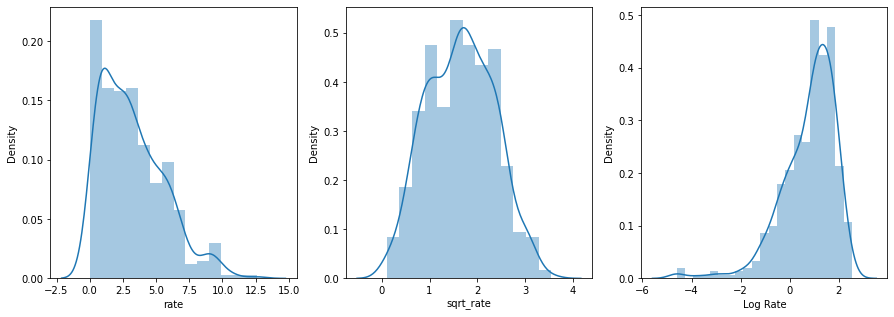

In [90]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'],ax=axes[0])
sns.distplot(df['sqrt_rate'],ax=axes[1])
sns.distplot(df['Log Rate'], ax=axes[2])

In [89]:

df['Box Cox']=pd.Series(stats.boxcox(df['rate']))[0]
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,load_id,SQRT_RATE,sqrt_rate,Log Rate,Box Cox
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,10243,1.466288,1.466288,0.765468,0.904014
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,10984,1.118034,1.118034,0.223144,0.234020
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,10990,0.824621,0.824621,-0.385662,-0.355832
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,10596,1.113553,1.113553,0.215111,0.225208
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,11415,1.769181,1.769181,1.141033,1.466821


In [74]:
print("The skewness of the original data is {}". format(df.rate.skew()))
print('The skewness of the SQRT Transformated data is {}'. format(df.SQRT_RATE.skew()))
print('The skewness of the LOG Transformated  data is {}'. format(df['Log Rate'].skew()))
print('The skewness of the BOXCOX Transformated data is {}'. format(df['Box Cox'].skew()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT Transformated data is 0.04964154055528862
The skewness of the LOG Transformated  data is -1.5943217626331552
The skewness of the BOXCOX Transformated data is -0.10722074773494229


In [96]:
fig,axes= plt.subplot(1,1,figsize=(15,5))

sns.distplot(df['Box Cox'],ax=axes[0])

ValueError: ignored

<Figure size 432x288 with 0 Axes>

BoxCox transformation

In [60]:

df_boxcox = pd.Series(stats.boxcox(d'])[0])

df.head()

NameError: ignored

# outliers

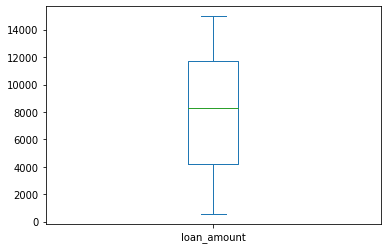

In [ ]:
df['loan_amount'].plot(kind='box')
